In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

%matplotlib inline

# Maximum Likelihood Estimation

The likelihood function $\mathcal{L}(\theta,y)$ describes the probability of observing data points $y$ given the parameters $\theta$. Maximum likelihood estimation (MLE) attempts to find $\hat{\theta} = \text{arg}\displaystyle{\max_{\theta \in \Theta}} \mathcal{L}(\theta,y)$. That is, it tries to find the $\theta$ that maximizes $\mathcal{L}$. In other words, MLE is a method of estimating the parameters of a statistical model given observations.

## Likelihood Function

$$\mathcal{L}(\theta|X) = Pr(X|\theta)$$

Note, however, that the likelihood function is not a probability distribution function. $\theta$ is not a random variable. Rather, the random variable $X$, the random variable of data points, is held constant (it is given). This definition only helps when evaluating the likelihood function, but likelihood is not a probability.

When the samples in the data are assumed to be independently drawn, the likelihood function can also be defined as such:

$$\mathcal{L}(\theta|X) = \displaystyle{\prod_i}f(X_i;\theta)$$

where $f$ is the distribution function with parameters $\theta$ (e.g. $f$ is a Gaussian with parameters $\theta = (\mu,\sigma)$). What this means is that for each data point, we get the probability that the sample was drawn. Then to get the likelihood for the entire data set, we multiply these probabilities.

### Coin Toss Example

If we were trying to find the fairness of a coin, then we start out not knowing what $Pr(H)$ is. But we can try and find $Pr(H)$ experimentally by flipping the coin many times. In this example, $\theta = Pr(H)$ is the parameter we are estimating.

In [2]:
def coin_toss(tosses,heads):
    p = np.arange(1e-4,1-1e-4,.001)
    n = tosses
    k = heads
    y = (p**k)*((1-p)**(n-k))
    return p,y

def plot_likelihood(theta,likelihood,sequence):
    plt.plot(theta,likelihood)
    plt.title('Likelihood (Coin Toss: {})'.format(sequence))
    plt.xlabel('$\\Theta$')
    plt.ylabel('Likelihood')
    plt.show()

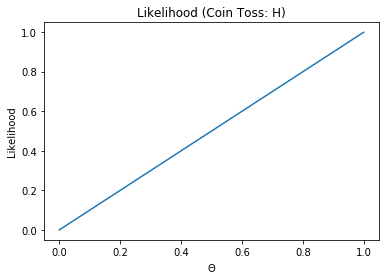

In [3]:
theta,likelihood = coin_toss(1,1)
plot_likelihood(theta,likelihood,'H')

With a single toss we get heads. Then given the very little data we have, it's *highly likely* that $Pr(H) = 1$. So the maximum likelihood is 1. Also note that the area under the curve is $\frac{1}{2}$, which further illustrates the point that the likelihood functions is not a probability distribution function.

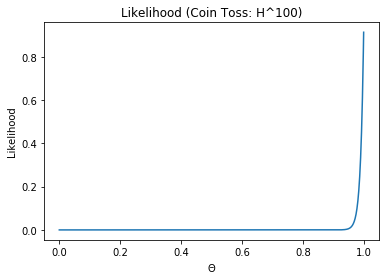

In [4]:
theta,likelihood = coin_toss(100,100)
plot_likelihood(theta,likelihood,'H^100')

If we flip the coin 100 times and get heads 100 times, then it is *highly likely* that $Pr(H)=1$, so $\hat{\theta}=1$ still maximizes $\mathcal{L}(\theta|X)$.

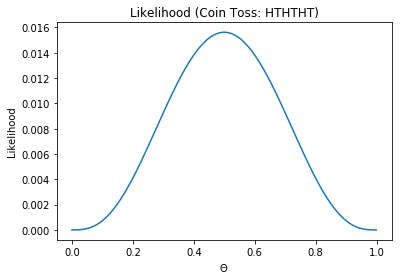

In [5]:
theta,likelihood = coin_toss(6,3)
plot_likelihood(theta,likelihood,'HTHTHT')

When the data is evenly split between heads and tails, $\hat{\theta}=0.5$ maximizes $\mathcal{L}(\theta|X)$.

### Guassian Distribution Example

A normal distribution $\mathcal{N}(\mu,\sigma^2)$ has two parameters:
- $\mu$ - mean
- $\sigma^2$ - variance

Given a set of data points, we want to maximize the likelihood function.

In [6]:
def draw_normal(mu,sigma,num_samples):
    x = np.random.normal(mu,sigma,num_samples)
    y = np.zeros(len(x))
    return x,y

def plot_points(x,y):
    plt.axvline(x=0,color='k')
    plt.axhline(y=0,color='k')
    plt.scatter(x,y)
    plt.ylim([-.25,1])
    plt.title('Distribution of Samples')
    plt.show()
    
def gaussian_sub_mu(mu_hats,sigma,x,log=False):
    likelihood = []
    for mu_hat in mu_hats:
        likelihood_y_vals = np.exp((-(x-mu_hat)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
        if log:
            likelihood_y_vals = np.log(likelihood_y_vals).sum()
        else:
            likelihood_y_vals = np.prod(likelihood_y_vals)
        likelihood.append(likelihood_y_vals)
    return likelihood

def gaussian_sub_sigma(sigma_hats,mu,x,log=False):
    likelihood = []
    for sigma_hat in sigma_hats:
        likelihood_y_vals = np.exp((-(x-mu)**2)/(2*(sigma_hat**2)))/np.sqrt(2*np.pi*(sigma_hat**2))
        if log:
            likelihood_y_vals = np.log(likelihood_y_vals).sum()
        else:
            likelihood_y_vals = np.prod(likelihood_y_vals)
        likelihood.append(likelihood_y_vals)
    return likelihood

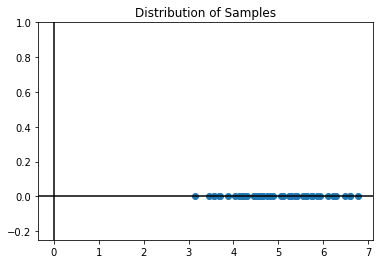

In [7]:
true_mu = 5
true_sigma = 1
x,y = draw_normal(true_mu,true_sigma,50)
plot_points(x,y)

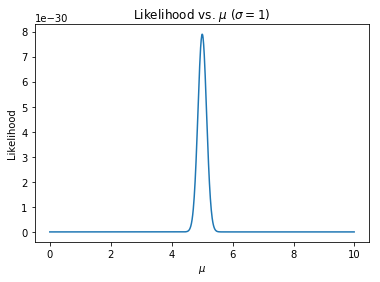

$\hat{\mu}$ = 5.0

Sample mean = 5.003584171586219

In [8]:
mu_hat = np.arange(0,10,.01)
likelihood = gaussian_sub_mu(mu_hat,1,x)
plt.plot(mu_hat,likelihood)
plt.title('Likelihood vs. $\mu$ ($\sigma=1$)')
plt.xlabel('$\mu$')
plt.ylabel('Likelihood')
plt.show()
display(Markdown('$\hat{\mu}$ = '+str(mu_hat[np.argmax(likelihood)])))
display(Markdown('Sample mean = '+str(x.mean())))

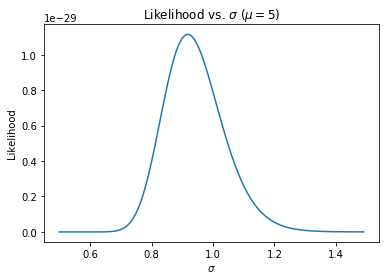

$\hat{\sigma}$ = 0.9200000000000004

Sample standard deviation = 0.9179226887797425

In [9]:
sigma_hat = np.arange(.5,1.5,.01)
likelihood = gaussian_sub_sigma(sigma_hat,5,x)
plt.plot(sigma_hat,likelihood)
plt.title('Likelihood vs. $\sigma$ ($\mu=5$)')
plt.xlabel('$\sigma$')
plt.ylabel('Likelihood')
plt.show()
display(Markdown('$\hat{\sigma}$ = '+str(sigma_hat[np.argmax(likelihood)])))
display(Markdown('Sample standard deviation = '+str(x.std())))

#### Notes on the plots above
- The parameter space is two dimensional, so to plot the likelihood function requires three dimensions. I'm plotting only cross-sections of the likelihood function.
- The likelihood function's values are really low. If we pay attention to the y-axis, the maximizers are both really small numbers (almost 0). And this is just with a data set of 50 points. Because we're multiplying probabilities ($p\in[0,1]$) together, over time, the likelihood function will get smaller and smaller. This is the problem the **log-likelihood function** solves.
- The sample mean and population standard deviation (standard deviation without Bessel's correction) _are_ the maximum likelihood estimators. This is because the MLE for the Gaussian, when derived by hand, converges to these values.

I will plot the log-likelihood function to demonstrate that the maxima are equal.

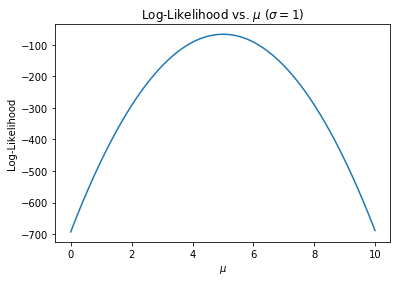

$\hat{\mu}$ = 5.0

Sample mean = 5.003584171586219

In [10]:
mu_hat = np.arange(0,10,.01)
log_likelihood = gaussian_sub_mu(mu_hat,1,x,True)
plt.plot(mu_hat,log_likelihood)
plt.title('Log-Likelihood vs. $\mu$ ($\sigma=1$)')
plt.xlabel('$\mu$')
plt.ylabel('Log-Likelihood')
plt.show()
display(Markdown('$\hat{\mu}$ = '+str(mu_hat[np.argmax(log_likelihood)])))
display(Markdown('Sample mean = '+str(x.mean())))

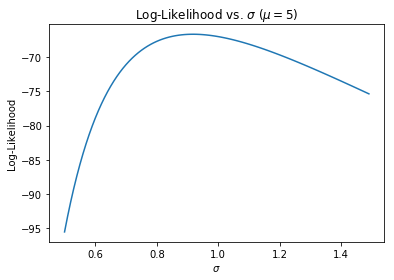

$\hat{\sigma}$ = 0.9200000000000004

Sample standard deviation = 0.9179226887797425

In [11]:
sigma_hat = np.arange(.5,1.5,.01)
log_likelihood = gaussian_sub_sigma(sigma_hat,5,x,True)
plt.plot(sigma_hat,log_likelihood)
plt.title('Log-Likelihood vs. $\sigma$ ($\mu=5$)')
plt.xlabel('$\sigma$')
plt.ylabel('Log-Likelihood')
plt.show()
display(Markdown('$\hat{\sigma}$ = '+str(sigma_hat[np.argmax(log_likelihood)])))
display(Markdown('Sample standard deviation = '+str(x.std())))

## Log-likelihood function
The log of the likelihood function peaks at the exact same place the likelihood function peaks. This is easier to deal with for two reasons:  
- We don't get the very small almost-zero likelihood values as shown above
- The log also helps us do away with the long chain of products and turns the problem into a long chain of sums instead. When taking the derivatives, we don't have to use the chain rule on the long chain of products.

### MLE of Gaussian
$$\begin{align*}
\mathcal{L}(\theta|X) &= \displaystyle{\prod_{i=1}^n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\\
\ell(\theta|X) &= \displaystyle{\sum_{i=1}^n}\ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right)\\
&= \displaystyle{\sum_{i=1}^n}\ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)+\ln\left(e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right)\\
&= \displaystyle{\sum_{i=1}^n}-\frac{1}{2}\ln(2\pi\sigma^2)-\frac{(x_i-\mu)^2}{2\sigma^2}\\
&= \displaystyle{\sum_{i=1}^n}-\frac{1}{2}\ln(2\pi)-\frac{1}{2}\ln(\sigma^2)-\frac{(x_i-\mu)^2}{2\sigma^2}\\
&= \displaystyle{\sum_{i=1}^n}-\frac{1}{2}\ln(2\pi)-\ln(\sigma)-\frac{(x_i-\mu)^2}{2\sigma^2}\\
&= -\displaystyle{\frac{n}{2}}\ln(2\pi)-n\ln(\sigma)-\sum_{i=1}^n\frac{(x_i-\mu)^2}{2\sigma^2}\\
\end{align*}$$

#### Derivative w.r.t $\mu$
$$\begin{align*}
\displaystyle{\frac{\partial}{\partial\mu}}\ell &= -0-0-\displaystyle{\sum_{i=1}^n}\frac{2(x_i-\mu)}{2\sigma^2}\\
&=\displaystyle{\sum_{i=1}^n}\frac{(x_i-\mu)}{\sigma^2}\\
&=\displaystyle{\frac{1}{\sigma^2}}\sum_{i=1}^nx_i-n\mu
\end{align*}$$

Then we equate the derivative to 0 to find the minimizer.

$$\displaystyle\frac{1}{\sigma^2}\sum_{i=1}^nx_i-n\mu = 0$$<br>
$$\displaystyle{\sum_{i=1}^n}x_i = n\mu$$<br>
$$\hat{\mu} = \displaystyle{\frac{1}{n}}\sum_{i=1}^nx_i$$

This is the formula for the **sample mean**.

#### Derivative w.r.t $\sigma$
$$\begin{align*}
\displaystyle{\frac{\partial}{\partial\sigma}}\ell &= -0-\displaystyle{\frac{n}{\sigma}}-\sum_{i=1}^n\frac{(x_i-\mu)^2}{2}\sigma^{-2}\\
&=-\displaystyle{\frac{n}{\sigma}}-\sum_{i=1}^n\frac{(x_i-\mu)^2}{2}(-2\sigma^{-3})\\
&=-\displaystyle{\frac{n}{\sigma}}+\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma^3}\\
&=-\displaystyle{\frac{n}{\sigma}}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2
\end{align*}$$

Then we equate the derivative to 0 to find the minimizer.

$$-\displaystyle{\frac{n}{\sigma}}+\frac{1}{\sigma^3}\sum_{i=1}^n(x_i-\mu)^2 = 0$$<br>
$$-n+\displaystyle{\frac{1}{\sigma^2}}\sum_{i=1}^n(x_i-\mu)^2 = 0$$<br>
$$\displaystyle{\frac{1}{\sigma^2}}\sum_{i=1}^n(x_i-\mu)^2 = n$$<br>
$$\sigma^2 = \displaystyle{\frac{1}{n}}\sum_{i=1}^n(x_i-\mu)^2$$<br>
$$\hat{\sigma} = \sqrt{\displaystyle{\frac{\sum_{i=1}^n(x_i-\mu)^2}{n}}}$$

This is the formula for the **population standard deviation**.

## Solving MLE by Gradient Descent Methods or Other Optimization Methods

The negative log-likelihood can be used as a cost function, which gets optimized by gradient descent methods or other optimization methods. Recall that minimizing the negative log-likelihood and maximizing the likelihood function are equivalent problems. In the previous example, the optimizer can be obtained with a nice formula. But in other cases, getting the optimizer is not as easy, so other methods must be used.